In [194]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [195]:
from settings import BASE_DIR

In [196]:


def load_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file into a pandas DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded data as a DataFrame.
    """
    full_path = f"{BASE_DIR}/{file_path}"
    df = pd.read_csv(full_path)
    return df

In [198]:
# load recorded data
data = load_data("Reports/sim_data_FS_nV_6.csv")
data.head(5)

,time,name,x,y,z,speed,acc,gap,command_velocity,reference_speed
0,0.12,leader,9500.0,-1.5,0.499903,0.030821,0.0,NaN,NaN,NaN
1,0.12,follower_0,9506.0,-1.5,0.499903,0.030821,0.0,1.5,0.0,2.0
2,0.12,follower_1,9512.0,-1.5,0.499903,0.030821,0.0,1.5,0.0,2.0
3,0.12,follower_2,9518.0,-1.5,0.499903,0.030821,0.0,1.5,0.0,2.0
4,0.12,follower_3,9524.0,-1.5,0.499903,0.030821,0.0,1.5,0.0,2.0


In [199]:
# check if any record in gap column is  zero
zero_gap_records = data[data['gap'] == 0]
print(f"Number of records with zero gap: {len(zero_gap_records)}")

Number of records with zero gap: 0


In [200]:
# minimum gap value
min_gap = data['gap'].min()
print(f"Minimum gap value: {min_gap}")

Minimum gap value: 1.5


In [201]:
# maximum gap value
max_gap = data['gap'].max()
print(f"Maximum gap value: {max_gap}")

Maximum gap value: 391.1474609375


In [202]:
# check when leader speed is zero, what are the gap values for the next 50 records
leader_zero_gap = data[data['speed'] == 0]['gap']
print(f"Gap values when leader speed is zero: {leader_zero_gap.tolist()}")

Gap values when leader speed is zero: []


In [203]:
# minimum speed value
min_speed = data['speed'].min()
print(f"Minimum speed value: {min_speed}")

Minimum speed value: 4.436609320268988e-05


In [204]:
# maximum speed value
max_speed = data['speed'].max()
print(f"Maximum speed value: {max_speed}")

Maximum speed value: 30.473206667279754


In [205]:


# get zero acceleration values of follower vehicle
zero_acceleration = data[data['speed'] == 0.0][['name','time', 'speed', 'acc', 'gap']]
print(f"Number of records with zero acceleration: {len(zero_acceleration)}")
print("Records with zero acceleration:")
zero_acceleration.head()

Number of records with zero acceleration: 0
Records with zero acceleration:


,name,time,speed,acc,gap


In [206]:
# minimum gap
min_gap = data[data['name']=='follower_5'][['gap']].min()
print(f"Minimum Gap value: {min_gap}")

Minimum Gap value: gap    1.5
dtype: float64


## Plot follower gaps

In [207]:
# plot follower_5 gap distribution for first nth records
# def plot_gap_distribution(data: pd.DataFrame,follower_name: str, n: int = None):
#     follower_gap_data = data[data['name'] == follower_name][['gap']]
#     if n:
#         follower_gap_data = follower_gap_data.iloc[:n]
#     plt.figure(figsize=(10, 6))
#     plt.plot(follower_gap_data['gap'], color='blue')
#     plt.title('Gap Distribution for Follower 5')
#     plt.xlabel('Gap (meters)')
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

def plot_gap_over_time(data: pd.DataFrame, follower_name: str, n: int = None):
    follower_gap_data = data[data['name'] == follower_name][['time', 'gap']]
    if n:
        follower_gap_data = follower_gap_data.iloc[:n]
    plt.figure(figsize=(10, 6))
    plt.plot(follower_gap_data['time'], follower_gap_data['gap'], color='blue')
    plt.title(f'Gap Over Time for {follower_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Gap (meters)')
    plt.grid(True)
    plt.show()

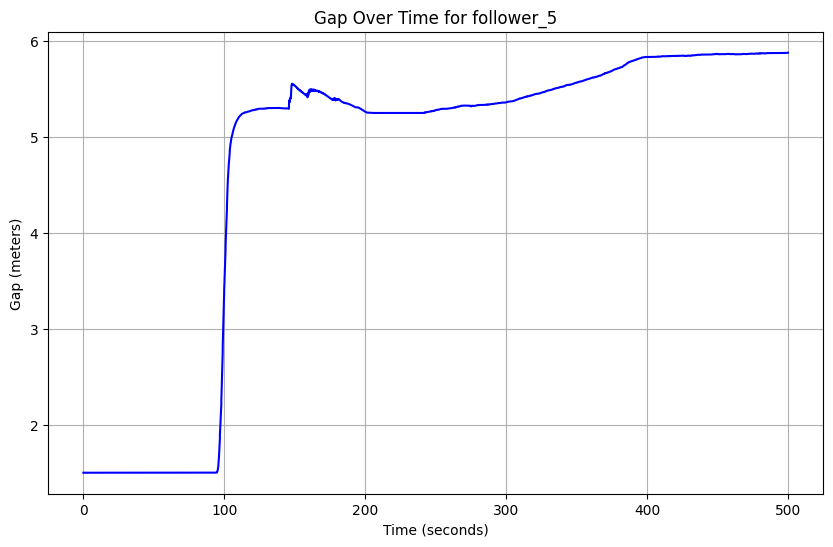

In [211]:
plot_gap_over_time(data, 'follower_5', n=5000)

# Plot command velocity vs gap distribution


In [212]:
def plot_command_velocity_and_gap(data: pd.DataFrame,max_points: int = 1000):

    data = data.head(max_points)  # Limit to max_points for clarity
    plt.figure(figsize=(12, 6))
    for label, group in data.groupby('name'):
        plt.plot(group['time'], group['command_velocity'], label=label, )
    
    # plt.plot(data['gap'], data['command_velocity'], alpha=0.5)
    plt.title('Command Velocity vs Gap')
    plt.xlabel('Time (m)')
    plt.ylabel('Command Velocity (m/s)')
    plt.grid(True)
    plt.legend()
    # plt.xlim(0, data['gap'].max() + 5)
    # plt.ylim(0, data['speed'].max() + 5)
    plt.show()

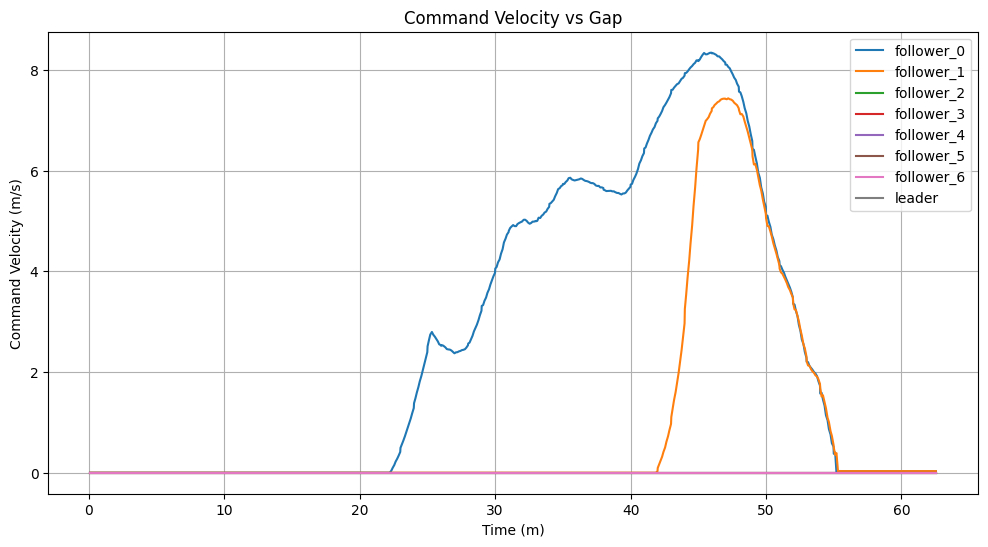

In [215]:
plot_command_velocity_and_gap(data,5000)

In [216]:
# Get the maximum speed value of follower vehicles only (excluding leader)
max_speed_follower = data[data['name'] != 'leader']['speed'].max()
min_speed_follower = data[data['name'] != 'leader']['speed'].min()

print(f"Maximum speed value of follower vehicle: {max_speed_follower:.3f} m/s")
print(f"Minimum speed value of follower vehicle: {min_speed_follower:.3f} m/s")


Maximum speed value of follower vehicle: 20.000 m/s
Minimum speed value of follower vehicle: 0.030 m/s


In [217]:
# Get the maximum speed value of follower vehicles only (excluding leader)
max_speed_leader = data[data['name'] == 'leader']['speed'].max()
min_speed_leader = data[data['name'] == 'leader']['speed'].min()

print(f"Maximum speed value of follower vehicle: {max_speed_leader:.3f} m/s")
print(f"Minimum speed value of leader vehicle: {min_speed_leader:.3f} m/s")

Maximum speed value of follower vehicle: 30.473 m/s
Minimum speed value of leader vehicle: 0.000 m/s


## Plot speed and time graph

In [218]:
def plot_speed(df,x_col,y_col,title, max_points: int = 1000,min_points: int = 0):
    df = df.iloc[min_points:max_points]  # Limit to max_points for clarity
    plt.figure(figsize=(12, 6))

    for label, group in df.groupby('name'):
        plt.plot(group[x_col], group[y_col], label=label,)
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


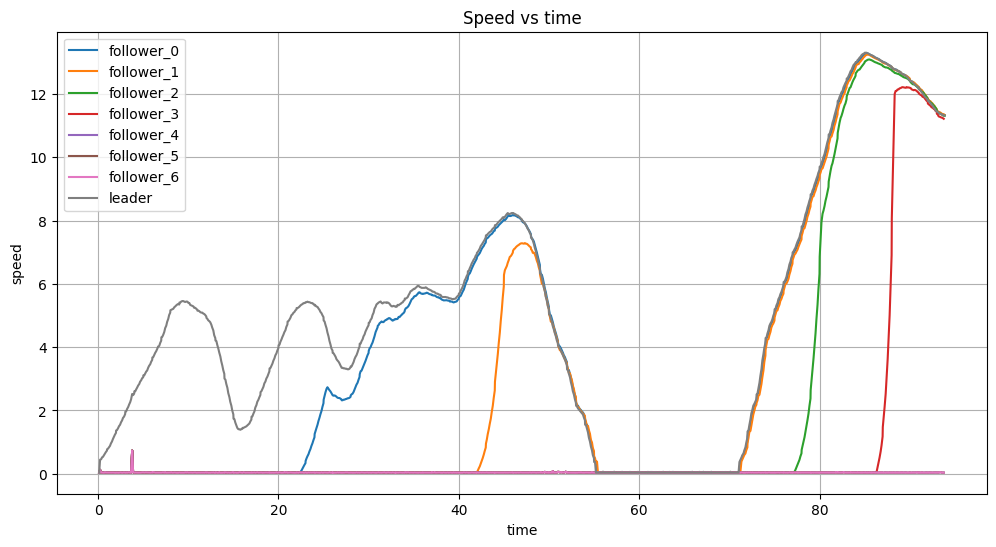

In [224]:
plot_speed(data,'time','speed','Speed vs time', max_points=7500,min_points=0)

In [247]:


def plot_follower_speed_profile(df, follower, max_points: int = None, min_points: int = 0):
    
    # Slice the data range
    if follower !='leader':
        for i in range(5):
            follower_name = f"follower_{i}"
            
            if i >= 0:
                leader_data = df[df['name'] == 'leader']
            else:
                imm_leader_name = f'follower_{i-1}'
                leader_data = df[df['name'] == imm_leader_name]
            
            follower_data = df[df['name'] == follower_name]
            if follower_data.empty:
                print(f"[Warning] No data found for follower: {follower_name}")
                return
            if max_points is not None:
                follower_data = follower_data.iloc[min_points:max_points]
                leader_data = leader_data.iloc[min_points:max_points]
                # immediate_leader = 
            else:
                follower_data = follower_data.iloc[min_points:]

            plt.figure(figsize=(10, 6))
            
            plt.plot(leader_data['time'], leader_data['speed'], label='Leader Speed', color='red')
            plt.plot(follower_data['time'], follower_data['speed'], label=follower_name)
            # plt.plot(follower_data['time'], follower_data['command_velocity'], label=f"{follower_name} Command Velocity", linestyle='--')
            # plt.plot(follower_data['time'], follower_data['reference_speed'], label=f"{follower_name} Reference Velocity", linestyle=':')
            plt.plot(follower_data['time'], follower_data['gap'], label=f"{follower_name} Gap", linestyle='-.')
            plt.xlabel('Time (s)')
            plt.ylabel('Speed (m/s)')
            plt.title(f'Speed Profile of follower_{i+1}')
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()
    else:
        follower_name = 'leader'
        follower_data = df[df['name'] == follower_name]
        if follower_data.empty:
            print(f"[Warning] No data found for follower: {follower_name}")
            return
        if max_points is not None:
            follower_data = follower_data.iloc[min_points:max_points]
        else:
            follower_data = follower_data.iloc[min_points:]

        plt.figure(figsize=(10, 6))
        
        plt.plot(follower_data['time'], follower_data['speed'], label=follower_name, color='red')
        plt.xlabel('Time (s)')
        plt.ylabel('Speed (m/s)')
        plt.title(f'Speed Profile of {follower_name}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


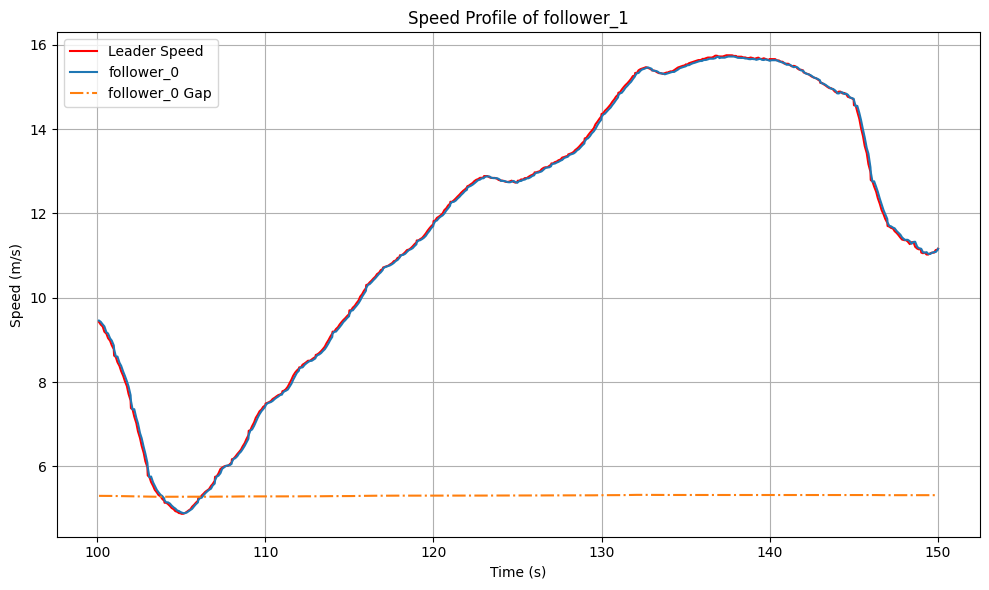

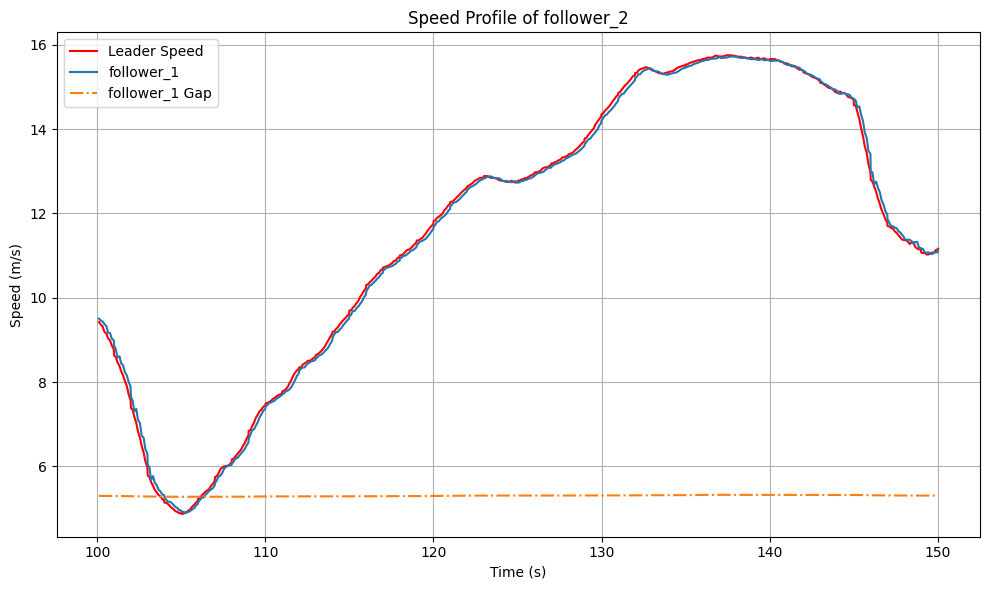

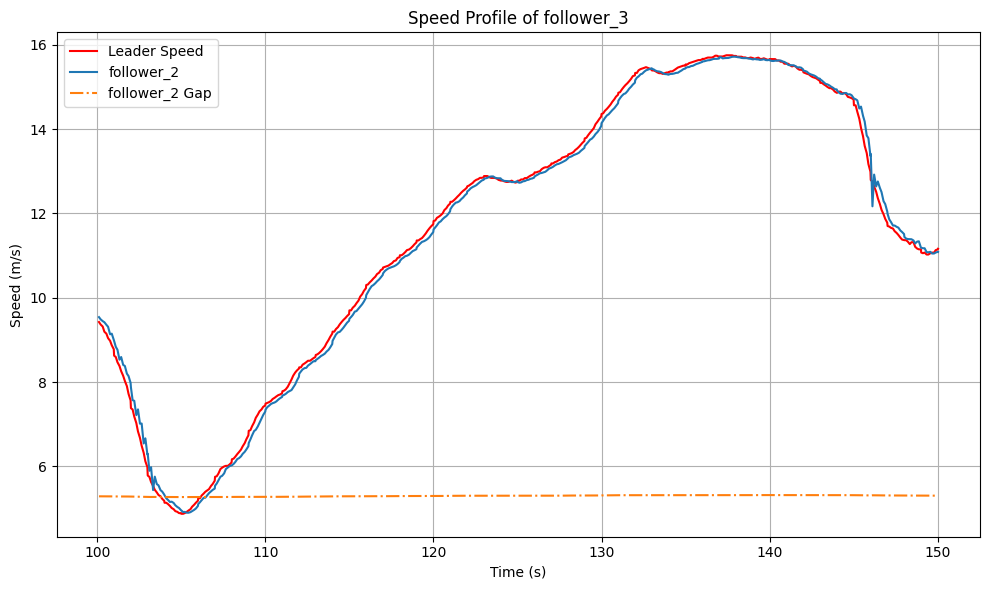

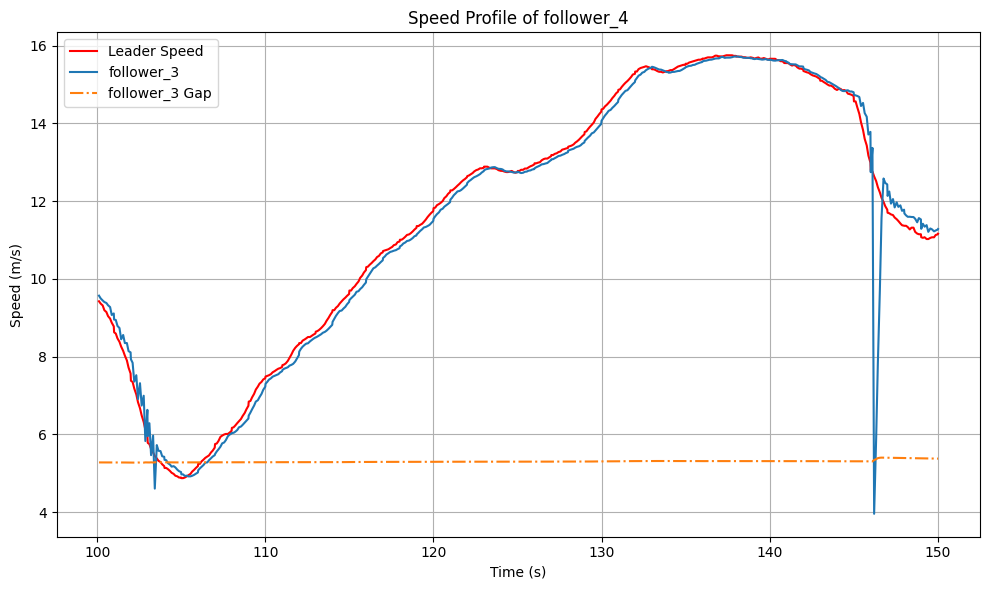

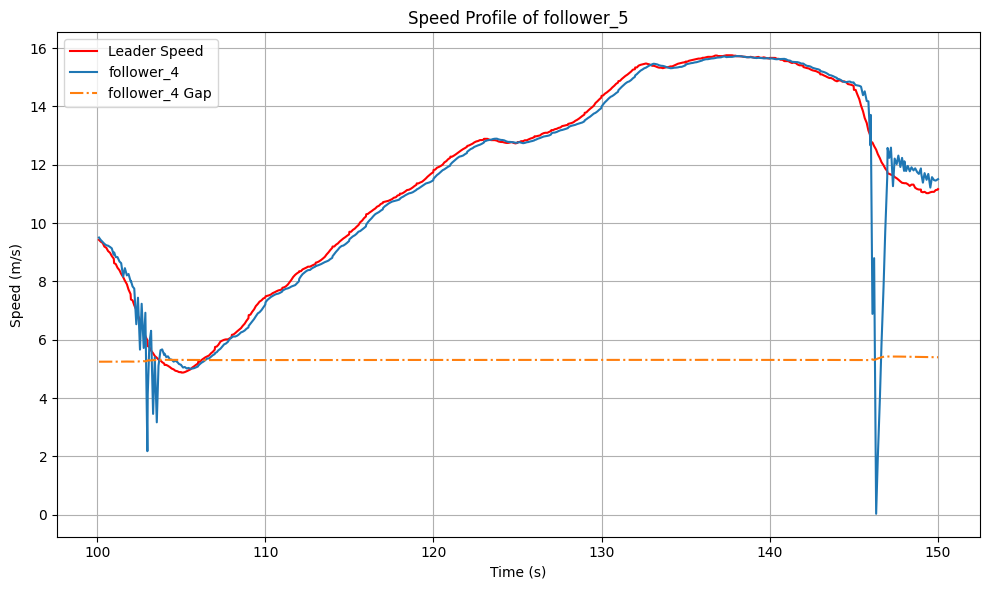

In [248]:
plot_follower_speed_profile(data, follower='follower', max_points=1500,min_points=1000)

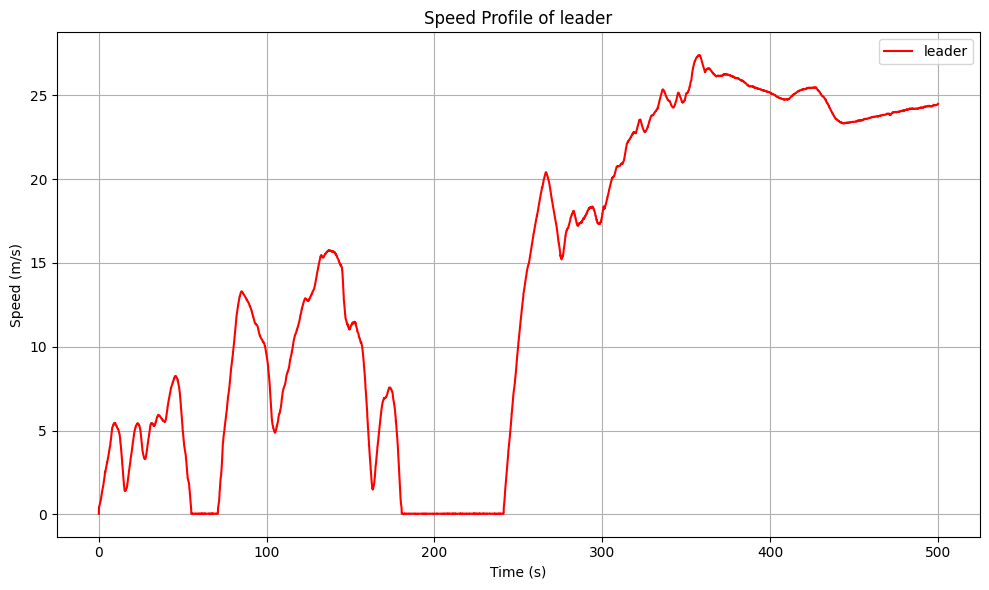

In [236]:
plot_follower_speed_profile(data, follower='leader', max_points=5000,min_points=0)